# Lab 6 - Network Optimization Models - The Minimum Spanning Tree Problem

<b>Information on group members:</b><br>
1) ER-2068, Eka Tsilosani <br>

In [1]:
%matplotlib inline
import csv
import math
import matplotlib.pyplot as plt

1.1) Get acquainted with the below "City" class definition. It has three major fields: name, city's longitude, and latitude. The coordinate's input is in the format "00°00'E/N," and it is converted to a list [degrees, minutes]. Also, these coordinates are also simply converted and stored as x and y coordinates. 

In [2]:
class City:
    def __init__(self, name, lon, lat):
        self.name = name

        # Helper function to convert coordinates like "52°10'N" to float values
        def parse_coord(c):
            # Remove direction characters (N, E, S, W)
            c = c.replace('N', '').replace('E', '').replace('S', '').replace('W', '')
            # Split degrees and minutes
            parts = c.split('°')
            degrees = float(parts[0])
            minutes = float(parts[1].replace("'", ""))
            # Convert to decimal format: Degrees + (Minutes / 60)
            return degrees + (minutes / 60.0)

        # Parse Longitude (X) and Latitude (Y)
        self.x = parse_coord(lon)
        self.y = parse_coord(lat)

    # Helper method to print city details nicely
    def __repr__(self):
        return f"{self.name} ({self.x:.2f}, {self.y:.2f})"


# 2. DATA LOADING
# This reads the 'cities.csv' file and fills the 'cities' list.

cities = []

try:
    with open('cities.csv', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # Check if the row has enough columns (Name, Lon, Lat)
            if len(row) >= 3:
                # Create a City object and add it to the list
                cities.append(City(row[0], row[1], row[2]))

    print(f"Successfully loaded {len(cities)} cities.")

except FileNotFoundError:
    print("Error: 'cities.csv' file not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded 2249 cities.


In [3]:
def calculate_distance_matrix(cities):
    N = len(cities)
    D = [[0.0] * N for _ in range(N)]
    for i in range(N):
        for j in range(i + 1, N):
            # Euclidean distance: sqrt((x2-x1)^2 + (y2-y1)^2)
            dist = math.sqrt((cities[i].x - cities[j].x)**2 + (cities[i].y - cities[j].y)**2)
            D[i][j] = dist
            D[j][i] = dist
    return D

# Compute the matrix
D = calculate_distance_matrix(cities)
print("Distance matrix calculated.")

Distance matrix calculated.


1.2) The below piece of code loads cities data from the cities.csv file and creates a list of cities.

In [4]:
# Load data from the CSV file
cities = []
try:
    with open('cities.csv', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # Ensure the row has enough data (Name, Lon, Lat)
            if len(row) >= 3:
                cities.append(City(row[0], row[1], row[2]))
    print(f"Successfully loaded {len(cities)} cities.")
except FileNotFoundError:
    print("Error: 'cities.csv' file not found.")

Successfully loaded 2249 cities.


1.3) The function below plots all cities according to their X and Y coordinates. Note that there are so many cities that Poland's boundaries can be observed. Feel free to modify the code. The unrequired input "edges" is a list of pairs of indices indicating edges to be drawn. 

Starting Prim's algorithm from: Hel
Constructed 10 edges...
Constructed 20 edges...
Constructed 30 edges...
Constructed 40 edges...
Constructed 50 edges...
Constructed 60 edges...
Constructed 70 edges...
Constructed 80 edges...
Constructed 90 edges...
Constructed 100 edges...
Constructed 110 edges...
Constructed 120 edges...
Constructed 130 edges...
Constructed 140 edges...
Constructed 150 edges...
Constructed 160 edges...
Constructed 170 edges...
Constructed 180 edges...
Constructed 190 edges...
Constructed 200 edges...
Constructed 210 edges...
Constructed 220 edges...
Constructed 230 edges...
Constructed 240 edges...
Constructed 250 edges...
Constructed 260 edges...
Constructed 270 edges...
Constructed 280 edges...
Constructed 290 edges...
Constructed 300 edges...
Constructed 310 edges...
Constructed 320 edges...
Constructed 330 edges...
Constructed 340 edges...
Constructed 350 edges...
Constructed 360 edges...
Constructed 370 edges...
Constructed 380 edges...
Constructed 390 edges..

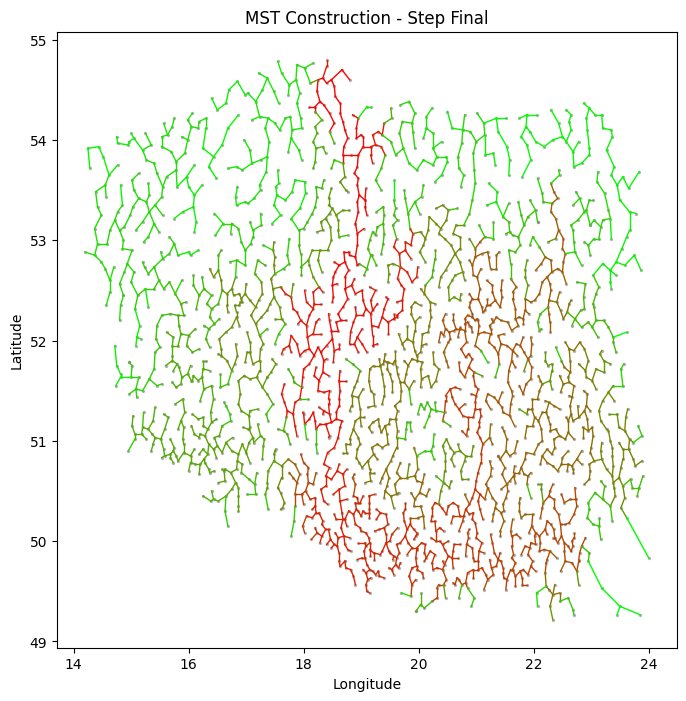

In [5]:
def plotMap(cities, edges, current_step):
    plt.figure(figsize=(8, 8))

    # Plot all cities as small dots
    X = [c.x for c in cities]
    Y = [c.y for c in cities]
    plt.scatter(X, Y, s=2, c='gray', alpha=0.5)

    # Plot edges
    # Gradient Logic: Red (start) -> Green (end)
    total_edges = len(cities) - 1

    for i, (u, v) in enumerate(edges):
        # Calculate color ratio (0.0 to 1.0)
        ratio = i / max(1, total_edges)
        # Red decreases from 1 to 0, Green increases from 0 to 1
        color = (1.0 - ratio, ratio, 0.0)

        plt.plot([cities[u].x, cities[v].x],
                 [cities[u].y, cities[v].y],
                 c=color, linewidth=1)

    plt.title(f"MST Construction - Step {current_step}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

def getSpanningTree(startingNode, cities, D):
    N = len(cities)
    IN_TREE = set([startingNode])
    edges = [] # List of tuples (u, v)

    # OPTIMIZATION: Keep track of the nearest distance from the TREE to every node OUTSIDE.
    # Initialize with distances from the starting node.
    # min_dist[i] = (distance, parent_node_in_tree)
    min_dist = {}

    for i in range(N):
        if i != startingNode:
            min_dist[i] = (D[startingNode][i], startingNode)

    # Main Loop: runs N-1 times (to add N-1 edges)
    while len(edges) < N - 1:

        # 1. Find the node with the smallest distance to the current tree
        best_node = -1
        smallest_dist = float('inf')
        parent_node = -1

        for node, (dist, parent) in min_dist.items():
            if dist < smallest_dist:
                smallest_dist = dist
                best_node = node
                parent_node = parent

        # 2. Add this best node to the tree
        IN_TREE.add(best_node)
        edges.append((parent_node, best_node))

        # Remove from our tracking list since it's now in the tree
        del min_dist[best_node]

        # 3. Update distances for remaining nodes
        # If the new node (best_node) offers a shorter path to any outside node, update it.
        for node in min_dist:
            new_dist = D[best_node][node]
            if new_dist < min_dist[node][0]:
                min_dist[node] = (new_dist, best_node)

        # Display intermediate steps

        if len(edges) % 10 == 0: #10 makes code slower
            print(f"Constructed {len(edges)} edges...")
            # plotMap(cities, edges, len(edges)) # Uncomment to visualize LIVE (very slow)

    return edges

# --- Execution ---

# Find index of "Hel" or just pick 0
start_idx = 0
# If you want to search for Hel specifically:
for i, c in enumerate(cities):
    if "Hel" in c.name:
        start_idx = i
        break

print(f"Starting Prim's algorithm from: {cities[start_idx].name}")
mst_edges = getSpanningTree(start_idx, cities, D)

# Final Plot with Gradient (100% Red -> 100% Green)
print("Plotting final map with gradient...")
plotMap(cities, mst_edges, "Final")

1.3) The dataset consists of 2249 cities. It may be too much when it comes to implementing the algorithm for constructing the minimum spanning tree (computational burden). Therefore, you can consider only every n-th row from the dataset to ensure that the computations will be completed in a reasonable time. 

In [6]:
# The dataset (2249 cities) might be too large for slow algorithms.
# We take every n-th city to reduce the computational burden.

n = 3
cities_small = cities[2::n] # Start from index 2, take every 3rd city

print(f"Original dataset size: {len(cities)}")
print(f"Reduced dataset size: {len(cities_small)}")

Original dataset size: 2249
Reduced dataset size: 749


1.4) Finish the function below for constructing a distance matrix. Each i-th row should contain distances from the i-th city to other cities. For convenience and to improve the algorithm's computational complexity for constructing the spanning tree, it is suggested to keep rows sorted according to distance. Rows may contain information on the j-th indices of the respective destinations along with the distances in a tuple (j-th indice, distance). 

You can use the Euclidean distance for computations. You can use the x and .y fields that store the geographical coordinates. This way of formulating a distance does not have much sense because the computation would be based on angles. Nonetheless, it is allowed in this exercise to do so, but if you wish, you can calculate the distances correctly by computing arc lengths between two points on a sphere - Earth. 

In [7]:
def getSortedDistances(cities):

    #Computes a distance matrix where neighbors are sorted by distance.
    #Returns a list of lists: D[i] = [(neighbor_index, distance), ...]

    N = len(cities)
    # Initialize the structure
    D = [[] for _ in range(N)]

    for i in range(N):
        for j in range(N):
            if i == j:
                continue # Skip distance to self

            # Calculate Euclidean distance between city i and city j
            dist = math.sqrt((cities[i].x - cities[j].x)**2 + (cities[i].y - cities[j].y)**2)

            # Append tuple: (index of neighbor, distance)
            D[i].append((j, dist))

        # Sort the list of neighbors based on distance (smallest to largest)
        # x[1] refers to the 'dist' value in the tuple
        D[i].sort(key=lambda x: x[1])

    return D

# Calculate the matrix for the reduced dataset
print("Calculating sorted distance matrix...")
D = getSortedDistances(cities_small)
print("Distance matrix calculation complete.")
# Test: Print nearest neighbors of the first city
print(f"Nearest neighbors for {cities_small[0].name} : {D[0][:3]}")

Calculating sorted distance matrix...
Distance matrix calculation complete.
Nearest neighbors for Adamówka : [(550, 0.11785113019775875), (287, 0.15365907428821377), (27, 0.16414763002993368)]


1.5) Auxiliary function for finding a corresponding index in the data set for a provided city name. 

In [8]:
def getIdx(name, cities):
    #Finds the index of a city in the provided list by its name.
    #Returns None if not found.

    for i, c in enumerate(cities):
        if name == c.name:
            return i
    return None

# Test finding "Hel" in the small list
hel_idx = getIdx("Hel", cities_small)
print(f"Index of 'Hel' in reduced list: {hel_idx}")

Index of 'Hel' in reduced list: 178


1.6) Complete the below greedy algorithm for constructing the minimum spanning tree. As an input, it should return a list of edges of the constructed subgraph, which can then be used in the plotMap function to show the tree structure. You can set the city of Hel as an initial node. 

Starting Prim's Algorithm from node index: 178...
Algorithm finished. Total edges: 748


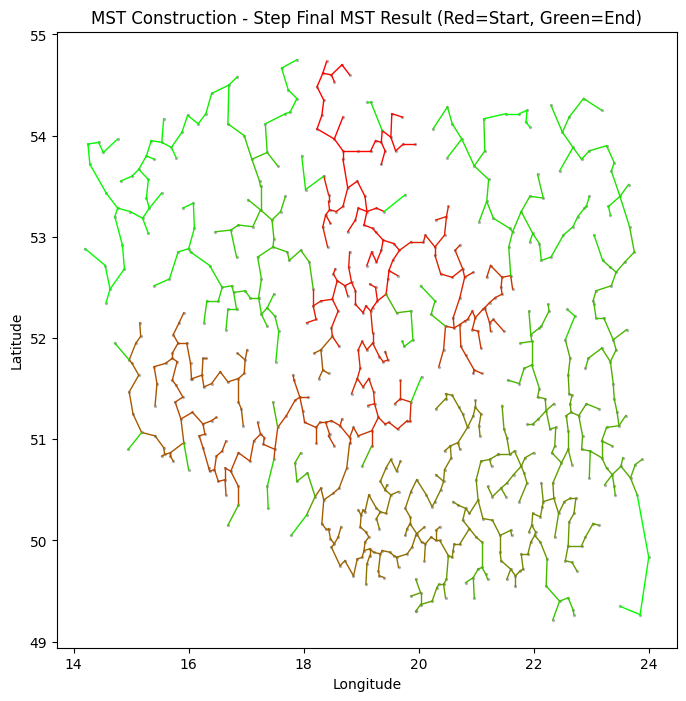

In [9]:
def getSpanningTree(startingNode, cities, D):
    """
    Constructs the Minimum Spanning Tree (MST) using Prim's Greedy Algorithm.

    Parameters:
    - startingNode: Index of the city to start from (e.g., index of 'Hel').
    - cities: List of City objects.
    - D: The sorted distance matrix (List of lists of tuples).

    Returns:
    - edges: A list of [parent, child] pairs representing the tree structure.
    """

    N = len(cities)
    IN_TREE = set([startingNode]) # Set to keep track of visited nodes
    edges = [] # List to store the resulting MST edges

    # 'min_dist' dictionary tracks the shortest distance
    # from the current Tree to every node OUTSIDE the tree.
    # Format: { node_index: (distance_from_tree, parent_node_in_tree) }
    # Initialize all distances to infinity
    min_dist = {i: (float('inf'), -1) for i in range(N) if i != startingNode}

    # 1. Initialization Phase:
    # Update distances for the immediate neighbors of the starting node.
    # D[startingNode] contains tuples: (neighbor_index, distance)
    for neighbor, dist in D[startingNode]:
        if neighbor in min_dist:
            min_dist[neighbor] = (dist, startingNode)

    print(f"Starting Prim's Algorithm from node index: {startingNode}...")

    # 2. Main Greedy Loop
    # We need exactly N-1 edges to connect N nodes in a tree.
    while len(edges) < N - 1:

        # --- Step A: The Greedy Choice ---
        # Find the node outside the tree that is closest to the current tree.
        best_node = -1
        smallest_dist = float('inf')
        parent = -1

        for node, (dist, p) in min_dist.items():
            if dist < smallest_dist:
                smallest_dist = dist
                best_node = node
                parent = p

        # Safety check: if graph is disconnected (should not happen here)
        if best_node == -1:
            break

        # --- Step B: Add Node to Tree ---
        IN_TREE.add(best_node)
        edges.append([parent, best_node]) # Store the edge
        del min_dist[best_node] # Remove from candidates list since it's now in the tree

        # --- Step C: Update Distances ---
        # Now that 'best_node' is part of the tree, it might offer a shorter path
        # to other outside nodes. We check its neighbors.
        for neighbor, dist in D[best_node]:
            # Only update nodes that are still outside the tree
            if neighbor in min_dist:
                # If this new path is shorter than the old known path, update it.
                if dist < min_dist[neighbor][0]:
                    min_dist[neighbor] = (dist, best_node)

        # --- Step D: Intermediate Visualization ---
        # Display progress every 10 steps (or 100 for speed).
        if len(edges) % 100 == 0:
            # plotMap(cities, edges, current_step=f"Step {len(edges)}")  #uncomment the line below to see live plotting (slows down execution)
            pass

    return edges

# --- EXECUTION BLOCK ---

# 1. Identify the starting city "Hel"
start_index = getIdx("Hel", cities_small)
if start_index is None:
    start_index = 0 # Fallback if Hel is not found

# 2. Run the Algorithm
# Note: Ensure 'D' (the sorted distance matrix) was calculated in the previous cell.
edges = getSpanningTree(start_index, cities_small, D)

# 3. Final Visualization with Gradient
print(f"Algorithm finished. Total edges: {len(edges)}")
plotMap(cities_small, edges=edges, current_step="Final MST Result (Red=Start, Green=End)")

1.6) Modify the code so that it displays the results after 10 intermediate steps. In this way, you can get a better insight into how the algorithm constructs the spanning tree. Additionally, you can use, e.g., a gradient to distinguish between different iterations of the algorithm when plotting the map (e.g., 1-st iteration = 100% red, last iteration == 100% green). 

Starting Prim's Algorithm from node index: 178...
--- Process Update: 50 edges constructed ---


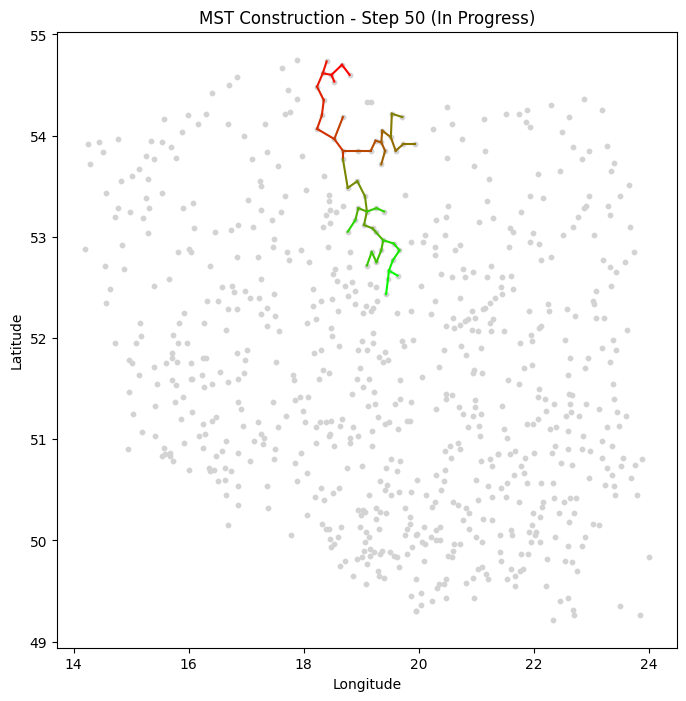

--- Process Update: 100 edges constructed ---


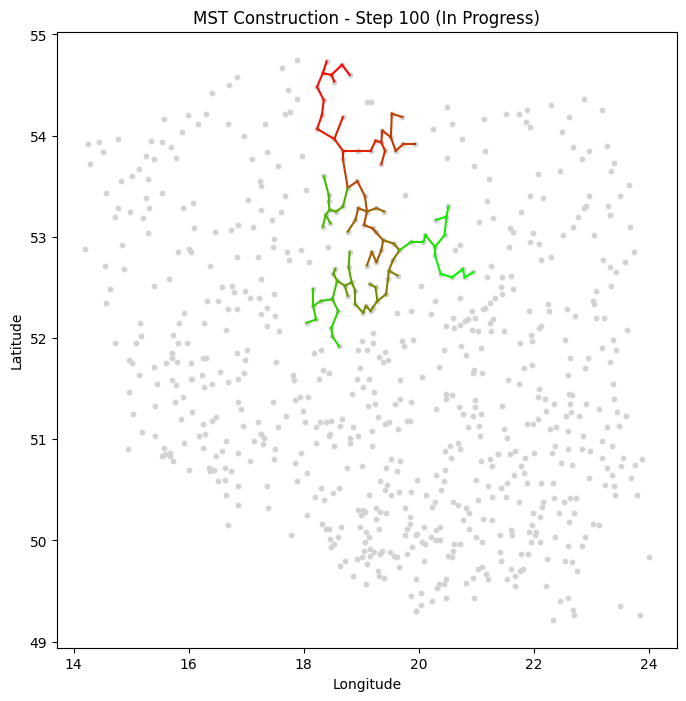

--- Process Update: 150 edges constructed ---


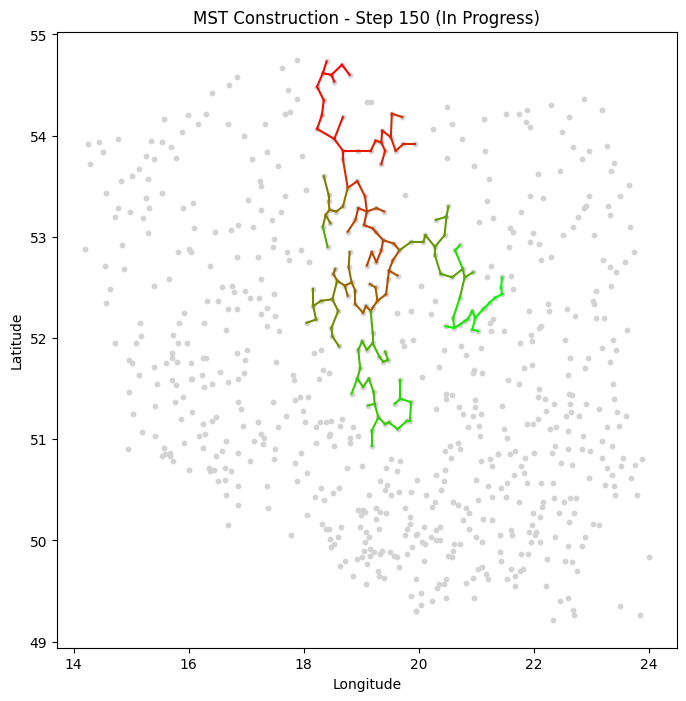

--- Process Update: 200 edges constructed ---


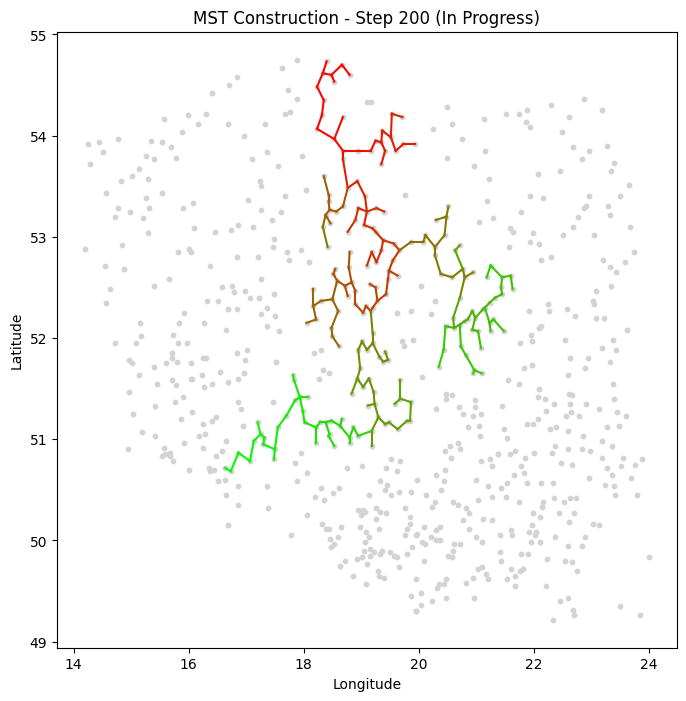

--- Process Update: 250 edges constructed ---


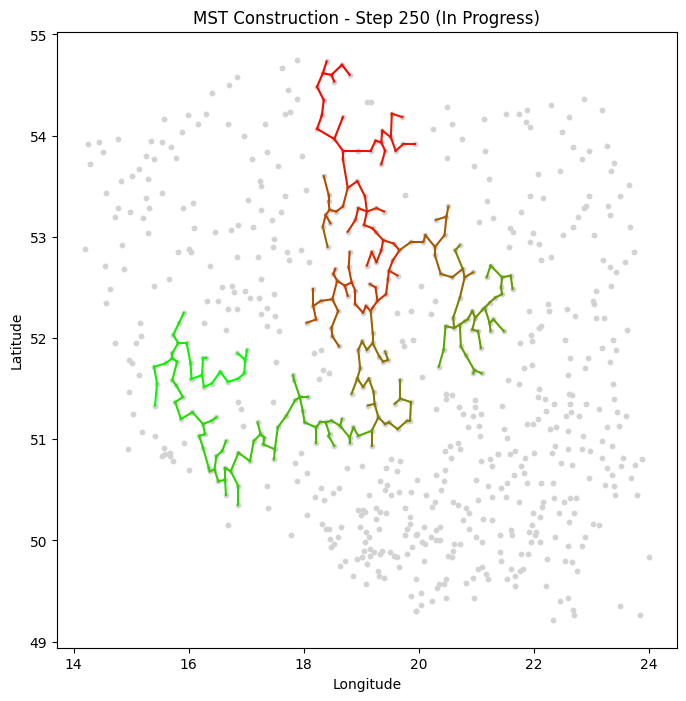

--- Process Update: 300 edges constructed ---


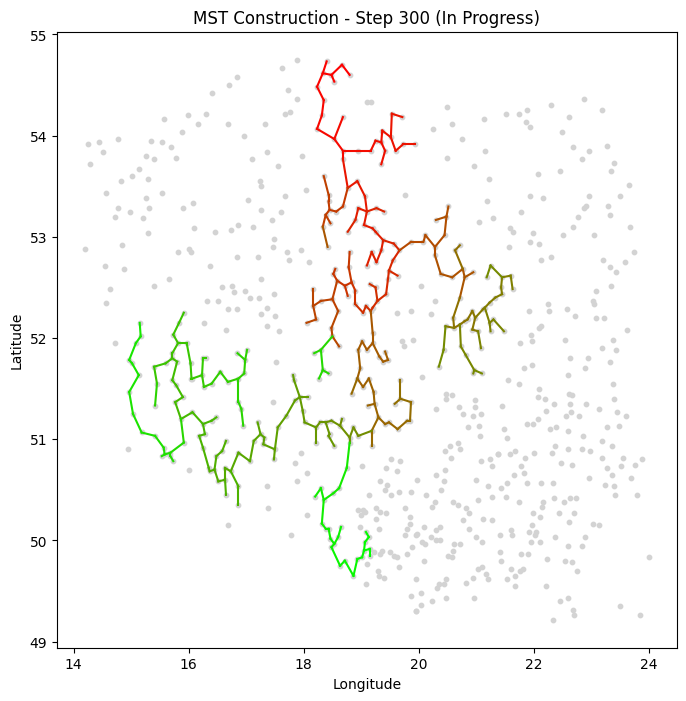

--- Process Update: 350 edges constructed ---


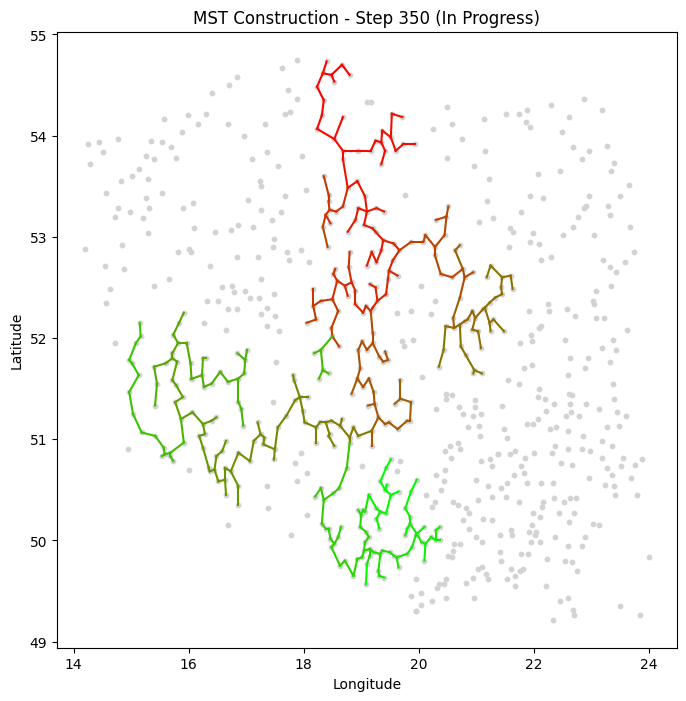

--- Process Update: 400 edges constructed ---


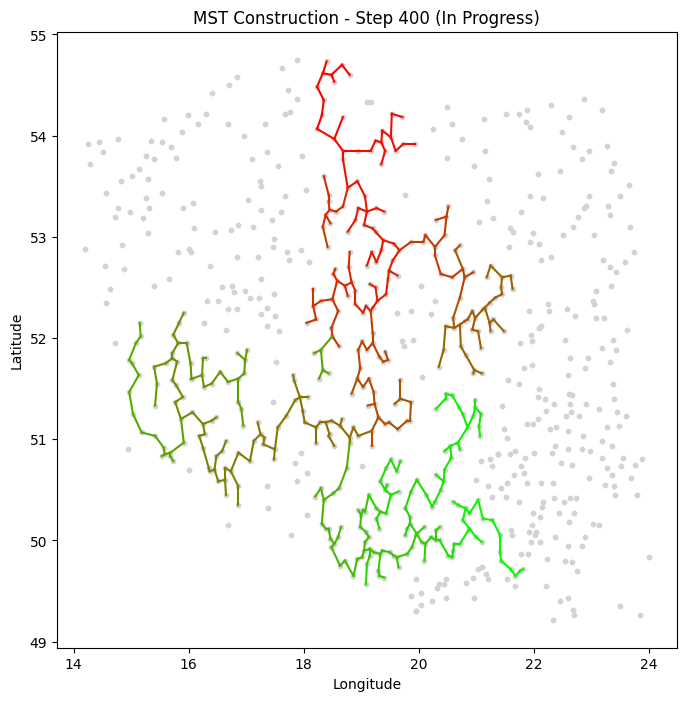

--- Process Update: 450 edges constructed ---


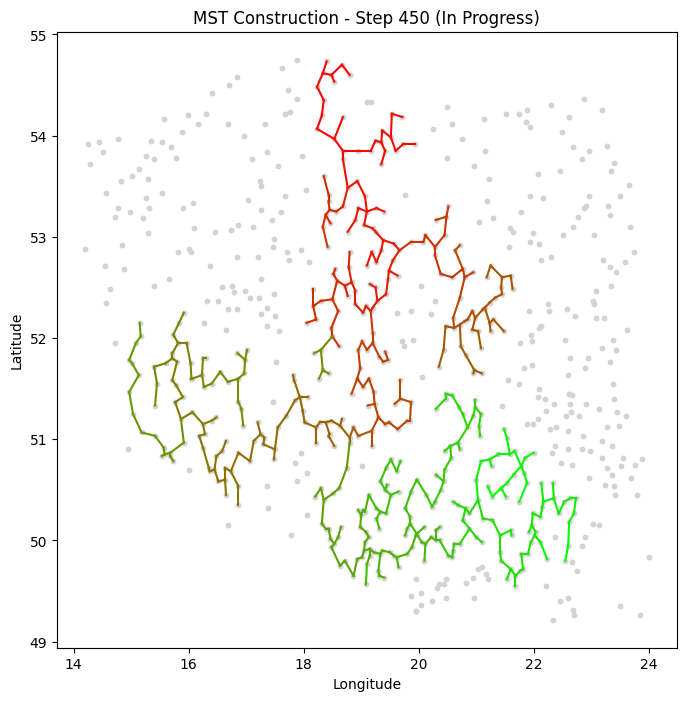

--- Process Update: 500 edges constructed ---


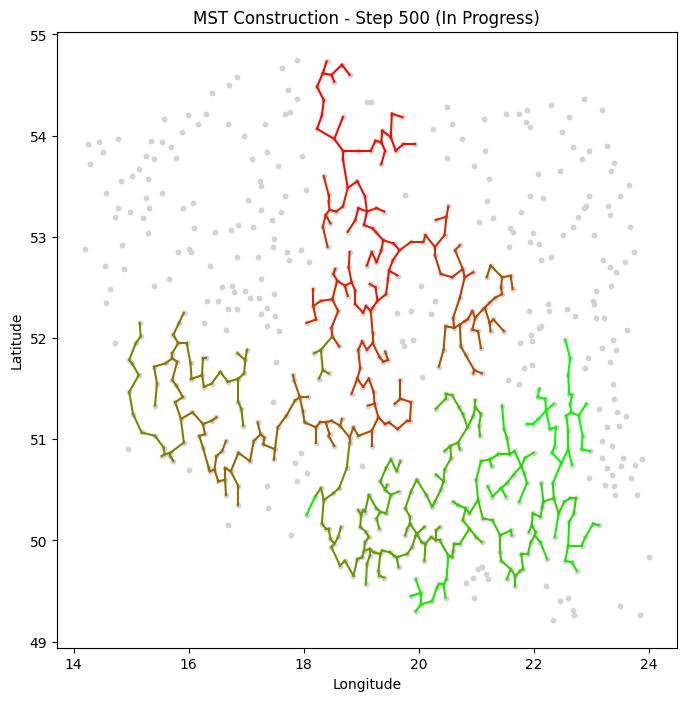

--- Process Update: 550 edges constructed ---


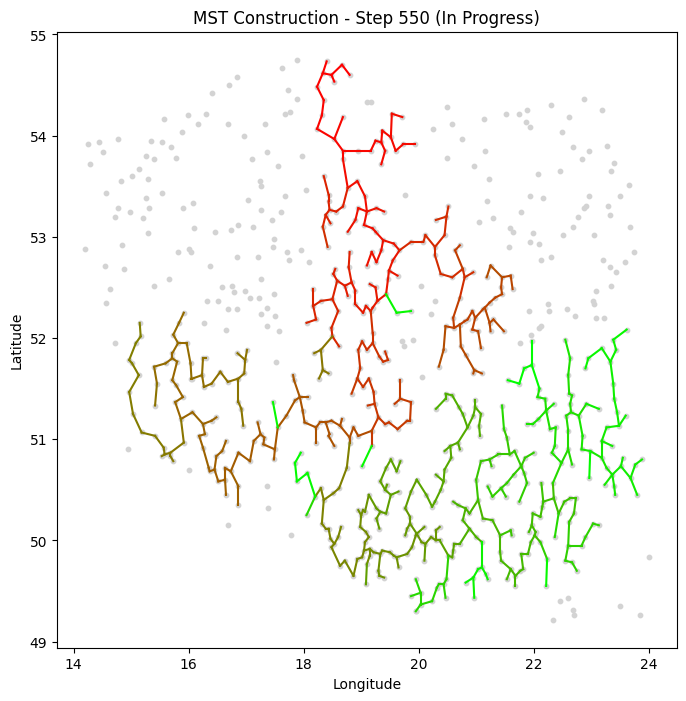

--- Process Update: 600 edges constructed ---


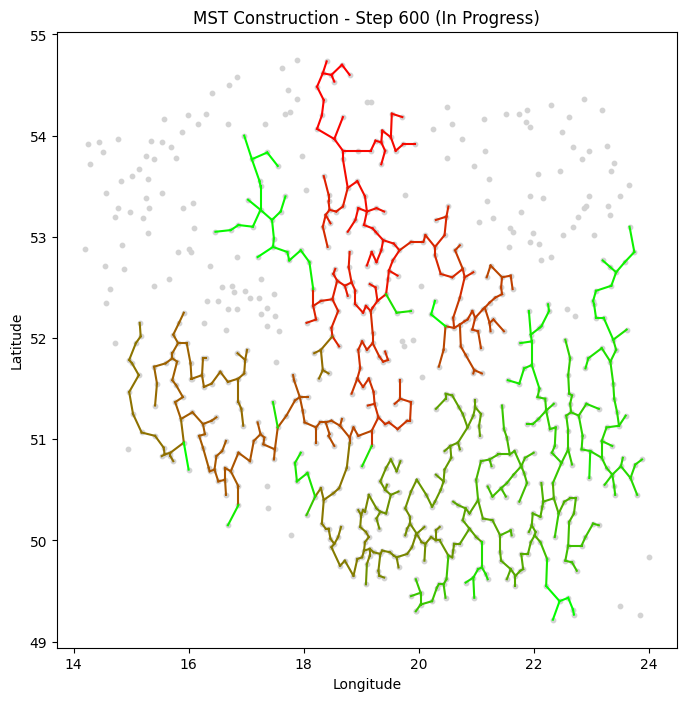

--- Process Update: 650 edges constructed ---


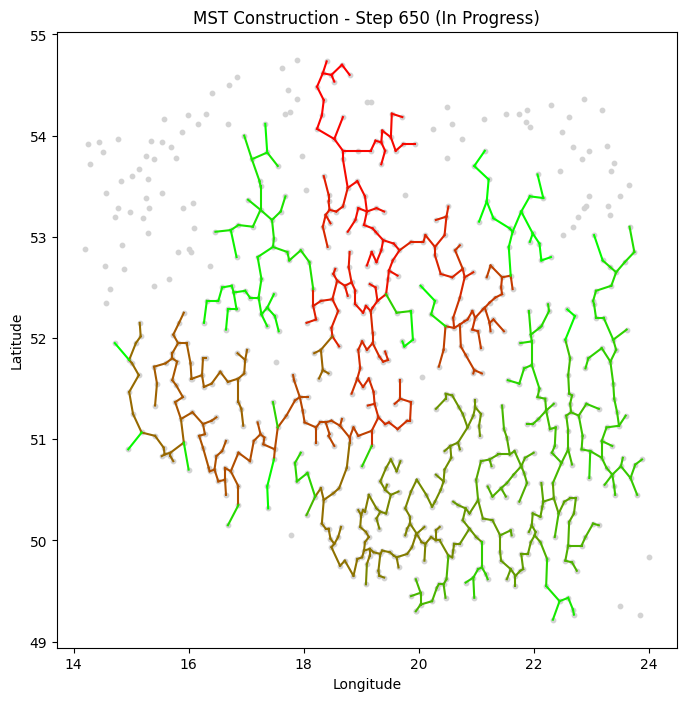

--- Process Update: 700 edges constructed ---


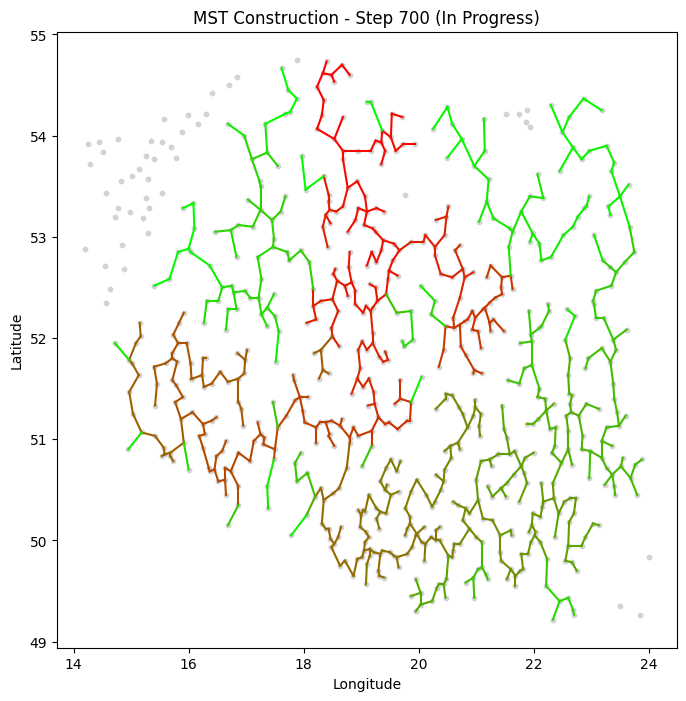

Algorithm Finished.


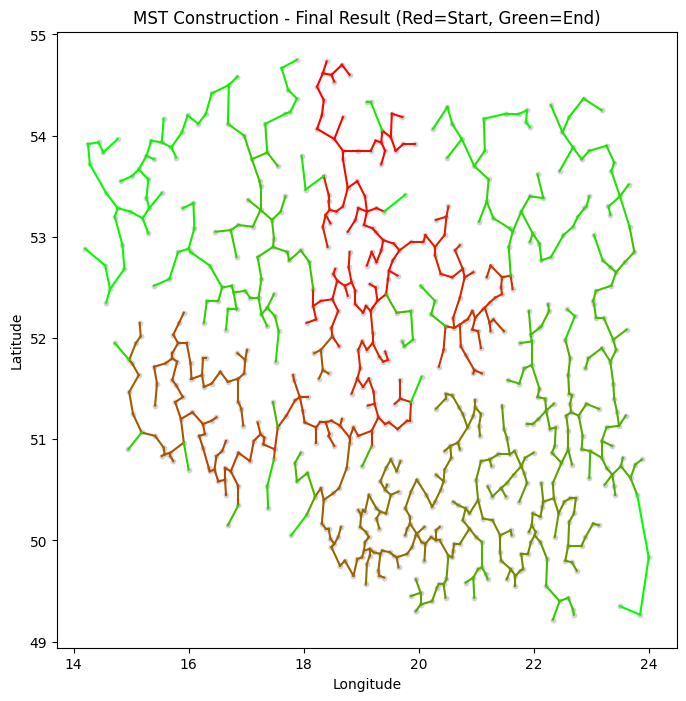

In [10]:
import matplotlib.pyplot as plt
import math

# 1. Visualization Function (Plots the map with Gradient)
def plotMap(cities, edges, current_step):

    # Plots the cities and edges.
    # Uses a color gradient: Red (start) -> Green (end).

    # Create a figure
    plt.figure(figsize=(8, 8))

    # Plot all cities as small gray dots
    X_coords = [c.x for c in cities]
    Y_coords = [c.y for c in cities]
    plt.scatter(X_coords, Y_coords, s=10, c='lightgray', zorder=1)

    # Calculate total edges to determine color ratio
    # If edges is empty, avoid division by zero
    max_edges = max(len(edges), 1)

    # Loop through edges and plot them with specific colors
    for i, (u, v) in enumerate(edges):
        # Ratio goes from 0.0 (first edge) to 1.0 (last edge)
        ratio = i / max_edges

        # Color Logic
        # Beginning: Red = 1.0, Green = 0.0
        # End:       Red = 0.0, Green = 1.0
        color = (1.0 - ratio, ratio, 0.0)

        plt.plot([cities[u].x, cities[v].x],
                 [cities[u].y, cities[v].y],
                 c=color, linewidth=1.5, zorder=2)

    plt.title(f"MST Construction - {current_step}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # This command forces the plot to appear immediately
    plt.show()

# 2. Prim's Algorithm (With Intermediate Visualization)

def getSpanningTree(startingNode, cities, D):

    # Constructs the Minimum Spanning Tree.
    # Plots the map at intermediate steps.

    N = len(cities)
    IN_TREE = set([startingNode])
    edges = []

    # Initialize 'min_dist' dictionary:
    # Key = Node Index, Value = (Distance, Parent Node)
    min_dist = {i: (float('inf'), -1) for i in range(N) if i != startingNode}

    # Update neighbors of the starting node
    for neighbor, dist in D[startingNode]:
        if neighbor in min_dist:
            min_dist[neighbor] = (dist, startingNode)

    print(f"Starting Prim's Algorithm from node index: {startingNode}...")

    # --- MAIN LOOP ---
    while len(edges) < N - 1:

        # A. Greedy Step: Find the closest node
        best_node = -1
        smallest_dist = float('inf')
        parent = -1

        for node, (dist, p) in min_dist.items():
            if dist < smallest_dist:
                smallest_dist = dist
                best_node = node
                parent = p

        if best_node == -1: break # Should not happen if connected

        # B. Add to Tree
        IN_TREE.add(best_node)
        edges.append([parent, best_node])
        del min_dist[best_node]

        # C. Update Neighbors
        for neighbor, dist in D[best_node]:
            if neighbor in min_dist:
                if dist < min_dist[neighbor][0]:
                    min_dist[neighbor] = (dist, best_node)

        # --- D. INTERMEDIATE VISUALIZATION ---

        # CHANGE '50' TO '10' if you want strictly every 10th step.
        if len(edges) % 50 == 0:
            print(f"--- Process Update: {len(edges)} edges constructed ---")
            plotMap(cities, edges, current_step=f"Step {len(edges)} (In Progress)")

    return edges

# 3. Execution Block

# 1. Find index of 'Hel'
start_index = getIdx("Hel", cities_small)
if start_index is None: start_index = 0

# 2. Run the algorithm (It will output multiple images now)
edges = getSpanningTree(start_index, cities_small, D)

# 3. Final Plot
print("Algorithm Finished.")
plotMap(cities_small, edges, "Final Result (Red=Start, Green=End)")